In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
plt.style.use('ggplot')
sns.set_palette("husl")

In [3]:
df = pd.read_csv("superstore_sales.csv.zip")


In [4]:
print("Dataset Overview:")
print("=" * 50)
print(f"Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print(f"\nData Types:\n{df.dtypes}")
print(f"\nMissing Values:\n{df.isnull().sum()}")


Dataset Overview:
Shape: (9800, 18)
Columns: ['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales']

Data Types:
Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
dtype: object

Missing Values:
Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code    

In [5]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [6]:
#preprocessing
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')


In [7]:
print("Missing values before cleaning:")
print(df.isnull().sum())

Missing values before cleaning:
Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64


In [8]:
df = df.dropna()

In [9]:
# Extract time-based features
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Month_Name'] = df['Order Date'].dt.month_name()
df['Quarter'] = df['Order Date'].dt.quarter

In [10]:
print("Data cleaning completed!")

Data cleaning completed!


In [11]:
#EDA

print("Sales Statistics:")
print("=" * 30)
print(f"Total Sales: ${df['Sales'].sum():,.2f}")
print(f"Average Sale: ${df['Sales'].mean():.2f}")
print(f"Number of Orders: {df.shape[0]}")
print(f"Date Range: {df['Order Date'].min()} to {df['Order Date'].max()}")

Sales Statistics:
Total Sales: $2,252,607.41
Average Sale: $230.12
Number of Orders: 9789
Date Range: 2015-01-03 00:00:00 to 2018-12-30 00:00:00


In [12]:
# 2. Sales by category
sales_by_category = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
print("\nSales by Category:")
print("=" * 30)
print(sales_by_category)


Sales by Category:
Category
Technology         825856.1130
Furniture          723538.4757
Office Supplies    703212.8240
Name: Sales, dtype: float64


In [13]:
sales_by_region = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
print("\nSales by Region:")
print("=" * 30)
print(sales_by_region)


Sales by Region:
Region
West       710219.6845
East       660589.3560
Central    492646.9132
South      389151.4590
Name: Sales, dtype: float64


In [14]:
top_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)
print("\nTop 10 Products by Sales:")
print("=" * 40)
print(top_products)


Top 10 Products by Sales:
Product Name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                                     19823.479
GBC Ibimaster 500 Manual ProClick Binding System                               19024.500
Hewlett Packard LaserJet 3310 Copier                                           18839.686
HP Designjet T520 Inkjet Large Format Printer - 24" Color                      18374.895
GBC DocuBind P400 Electric Binding System                                      17965.068
High Speed Automatic Electric Letter Opener                                    17030.312
Name: Sales, dtype: float64


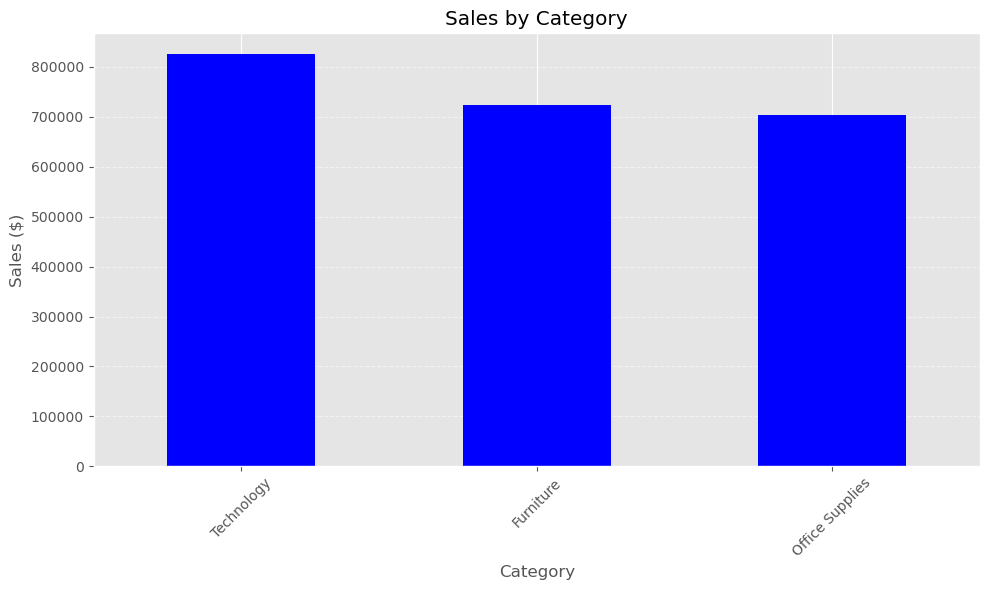

In [15]:
#visulization

# 1. Sales by category
plt.figure(figsize=(10, 6))
sales_by_category.plot(kind='bar', color='blue')
plt.title('Sales by Category')
plt.xlabel('Category')
plt.ylabel('Sales ($)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

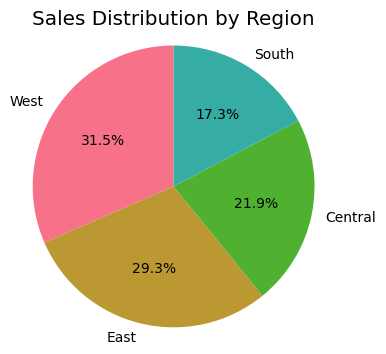

In [16]:
# 2. Sales by region
plt.figure(figsize=(4, 4))
plt.pie(sales_by_region, labels=sales_by_region.index, autopct='%1.1f%%', startangle=90)
plt.title('Sales Distribution by Region')
plt.axis('equal')
plt.show()

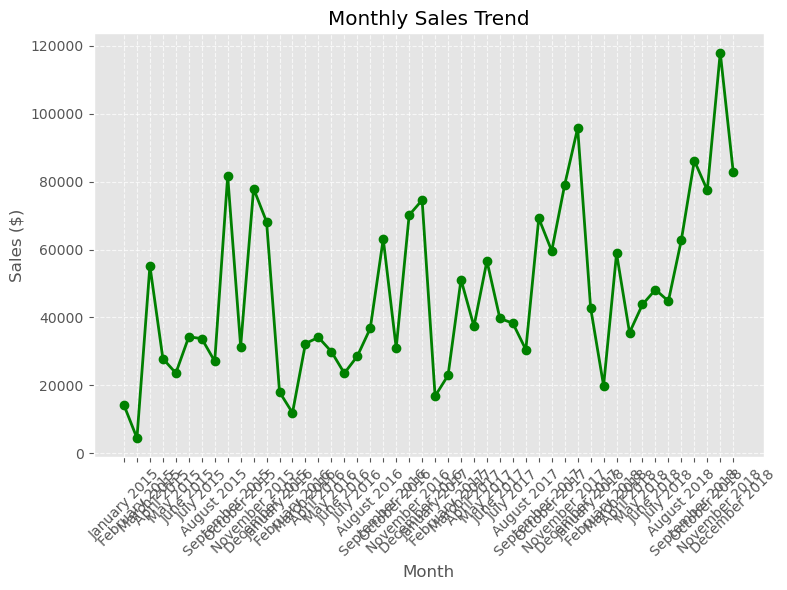

In [17]:
# 3. Monthly sales trend
monthly_sales = df.groupby(['Year', 'Month_Name', 'Month'])['Sales'].sum().reset_index()
monthly_sales = monthly_sales.sort_values(['Year', 'Month'])

plt.figure(figsize=(8, 6))
plt.plot(monthly_sales['Month_Name'] + ' ' + monthly_sales['Year'].astype(str), 
         monthly_sales['Sales'], marker='o', color='green', linewidth=2)
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales ($)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


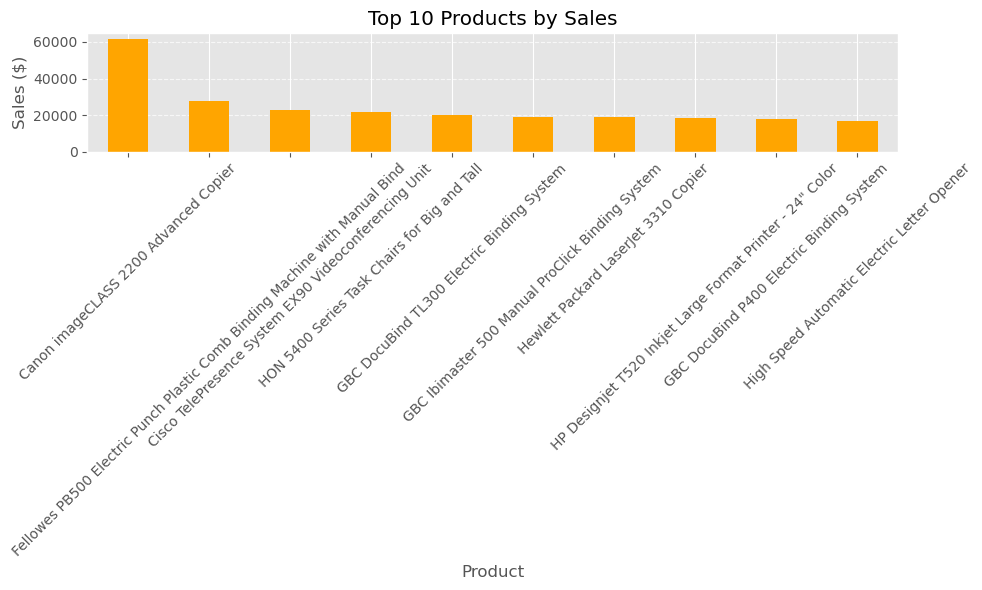

In [18]:
# 4. Top products
plt.figure(figsize=(10, 6))
top_products.plot(kind='bar', color='orange')
plt.title('Top 10 Products by Sales')
plt.xlabel('Product')
plt.ylabel('Sales ($)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [19]:
df.to_csv('cleaned_superstore_sales.csv', index=False)


In [20]:
plt.savefig('sales_by_category.png', dpi=300, bbox_inches='tight')


<Figure size 640x480 with 0 Axes>

In [42]:
print("Analysis completed successfully!")
print("Please save your notebook before submitting.")

Analysis completed successfully!
Please save your notebook before submitting.
